# Portfolio Allocation and Sharp Ratio 2.0

# IMPORT PACKAGES

In [1]:
import pandas as pd
import pandas_datareader.data as wb
from pandas.util.testing import assert_frame_equal

import numpy as np

import quandl 

import matplotlib.pyplot as plt
%matplotlib inline
from datetime import *

C:\Users\gordo\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


# INPUT SECURITIES TO LOOKUP

In [2]:
# . . . . . . . . . . DEFINE 5 SECURITIES TO LOOKUP . . . . . . . . . .
s1=input('Enter Ticker 1: ')
s2=input('Enter Ticker 2: ')
s3=input('Enter Ticker 3: ')
s4=input('Enter Ticker 4: ')

# . . . . . . . . . . ASSIGN ASSETS TO LONG STRING 'STOCKS' . . . . . . . . . .
stocks=(s1+'_'+s2+'_'+s3+'_'+s4)

Enter Ticker 1: AMD
Enter Ticker 2: AMZN
Enter Ticker 3: TSLA
Enter Ticker 4: BKNG


# SECURITY LOOKUP & SAVE TO CSV

In [3]:
# . . . . . . . . . . DATA PULL PERAMETERS . . . . . . . . . .
start = datetime(2015,1,31)
end = datetime.now()
date_span=('From: '+str(start)+' - To: '+str(end))

# . . . . . . . . . . YAHOO FINANCE WEB DATA PULL . . . . . . . . . .
s1_data=wb.DataReader(s1,'yahoo', start, end)
s2_data=wb.DataReader(s2,'yahoo', start, end)
s3_data=wb.DataReader(s3,'yahoo', start, end)
s4_data=wb.DataReader(s4,'yahoo', start, end)
s_data = wb.DataReader([s1, s2, s3, s4], 'yahoo', start, end)


data_price_1 = s1_data['Adj Close'].values
data_np_1 = s1_data.values

data_price_2 = s2_data['Adj Close'].values
data_np_2 = s2_data.values

data_price_3 = s3_data['Adj Close'].values
data_np_3 = s3_data.values

data_price_4 = s4_data['Adj Close'].values
data_np_4 = s4_data.values

data_price_4 = s_data['Adj Close'].values
data_np_4 = s_data.values

# . . . . . . . . . . SAVE BULK FILE TO CSV . . . . . . . . . .
s_data.to_csv(r'C:\Users\gordo\Programming\Data_Bank\Portfolio_Allocation_Sharpe\_'+stocks+'.csv')

In [4]:
# You can also read from the csv file uploaded. Please do uncomment the execute it.
# aapl = pd.read_csv('AAPL_CLOSE',index_col='Date',parse_dates=True)
# cisco = pd.read_csv('CISCO_CLOSE',index_col='Date',parse_dates=True)
# ibm = pd.read_csv('IBM_CLOSE',index_col='Date',parse_dates=True)
# amzn = pd.read_csv('AMZN_CLOSE',index_col='Date',parse_dates=True)

# NOMINALIZED RETURN

# ITERATE THROUGH DATA TO PRODUCE NOMINALIZED RETURN IN DF's


In [5]:
for df_stock in (s1_data, s2_data, s3_data, s4_data):
    df_stock['Normalize Return'] = df_stock['Adj Close']/df_stock.iloc[0]['Adj Close']
print(s1)
s1_data

AMD


,High,Low,Open,Close,Volume,Adj Close,Normalize Return
Date,,,,,,,
2015-02-02,2.750000,2.650000,2.690000,2.670000,25688700,2.670000,1.000000
2015-02-03,2.800000,2.680000,2.700000,2.760000,22592300,2.760000,1.033708
2015-02-04,2.920000,2.760000,2.780000,2.850000,34829300,2.850000,1.067416
2015-02-05,3.370000,2.870000,2.880000,3.310000,73355600,3.310000,1.239700
2015-02-06,3.210000,3.000000,3.200000,3.030000,38300000,3.030000,1.134831
...,...,...,...,...,...,...,...
2020-02-14,55.400002,54.560001,55.189999,55.310001,52365400,55.310001,20.715356
2020-02-18,58.130001,54.840000,54.939999,56.889999,70133200,56.889999,21.307115
2020-02-19,59.270000,57.509998,57.990002,58.900002,58597300,58.900002,22.059925


In [6]:
for df_stock in (s1_data, s2_data, s3_data, s4_data):
    df_stock['Normalize Return'] = df_stock['Adj Close']/df_stock.iloc[1]['Adj Close']
print(s2)
s2_data

AMZN


,High,Low,Open,Close,Volume,Adj Close,Normalize Return
Date,,,,,,,
2015-02-02,365.000000,350.010010,350.049988,364.470001,10231900,364.470001,1.002531
2015-02-03,367.820007,360.209991,360.290009,363.549988,6212600,363.549988,1.000000
2015-02-04,367.500000,358.230011,358.380005,364.750000,4169900,364.750000,1.003301
2015-02-05,378.799988,365.899994,366.000000,373.890015,7247600,373.890015,1.028442
2015-02-06,375.989990,371.010010,374.869995,374.279999,3892400,374.279999,1.029515
...,...,...,...,...,...,...,...
2020-02-14,2159.040039,2125.889893,2155.679932,2134.870117,2606200,2134.870117,5.872288
2020-02-18,2166.070068,2124.110107,2125.020020,2155.669922,2945600,2155.669922,5.929501
2020-02-19,2185.100098,2161.120117,2167.800049,2170.219971,2561200,2170.219971,5.969523


In [7]:
for df_stock in (s1_data, s2_data, s3_data, s4_data):
    df_stock['Normalize Return'] = df_stock['Adj Close']/df_stock.iloc[2]['Adj Close']
#print(s3)
#s3_data

In [8]:
for df_stock in (s1_data, s2_data, s3_data, s4_data):
    df_stock['Normalize Return'] = df_stock['Adj Close']/df_stock.iloc[3]['Adj Close']
#print(s4)
#s4_data

# ALLOCATION

Let's consider we have the following allocations for our total portfolio:

30% in Apple

20% in Google/Alphabet

40% in Amazon

10% in IBM


Let's have these values be reflected by multiplying our Norme Return by out Allocations

In [9]:
# INPUT ALLOCATIONS PER ASSET

s1_allocate=input('Enter Allocation In Decimal Format - (0.3) : ')
s1_a=float(s1_allocate)

s2_allocate=input('Enter Allocation In Decimal Format - (0.3) : ')
s2_a=float(s2_allocate)

s3_allocate=input('Enter Allocation In Decimal Format - (0.3) : ')
s3_a=float(s3_allocate)

s4_allocate=input('Enter Allocation In Decimal Format - (0.3) : ')
s4_a=float(s4_allocate)

Enter Allocation In Decimal Format - (0.3) : .4
Enter Allocation In Decimal Format - (0.3) : .1
Enter Allocation In Decimal Format - (0.3) : .1
Enter Allocation In Decimal Format - (0.3) : .4


In [10]:
for df_stock,allocation in zip([s1_data, s2_data, s3_data, s4_data],[s1_a,s2_a,s3_a,s4_a]):
    df_stock['Allocation'] = df_stock['Normalize Return']*allocation

In [11]:
print(s1)
s1_data

AMD


,High,Low,Open,Close,Volume,Adj Close,Normalize Return,Allocation
Date,,,,,,,,
2015-02-02,2.750000,2.650000,2.690000,2.670000,25688700,2.670000,0.806647,0.322659
2015-02-03,2.800000,2.680000,2.700000,2.760000,22592300,2.760000,0.833837,0.333535
2015-02-04,2.920000,2.760000,2.780000,2.850000,34829300,2.850000,0.861027,0.344411
2015-02-05,3.370000,2.870000,2.880000,3.310000,73355600,3.310000,1.000000,0.400000
2015-02-06,3.210000,3.000000,3.200000,3.030000,38300000,3.030000,0.915408,0.366163
...,...,...,...,...,...,...,...,...
2020-02-14,55.400002,54.560001,55.189999,55.310001,52365400,55.310001,16.709970,6.683988
2020-02-18,58.130001,54.840000,54.939999,56.889999,70133200,56.889999,17.187311,6.874925
2020-02-19,59.270000,57.509998,57.990002,58.900002,58597300,58.900002,17.794563,7.117825


In [12]:
#print(s2)
#s2_data

In [13]:
#print(s3)
#s3_data

In [14]:
#print(s4)
#s4_data

# INVESTMENT

Suppose we have invested one hundred thousand dollar $10,000 in all these portfolio

In [15]:
for df_stock in [s1_data, s2_data, s3_data, s4_data]:
    df_stock['Position Values'] = df_stock['Allocation']*10000

In [16]:
print(s1)
s1_data

AMD


,High,Low,Open,Close,Volume,Adj Close,Normalize Return,Allocation,Position Values
Date,,,,,,,,,
2015-02-02,2.750000,2.650000,2.690000,2.670000,25688700,2.670000,0.806647,0.322659,3226.586251
2015-02-03,2.800000,2.680000,2.700000,2.760000,22592300,2.760000,0.833837,0.333535,3335.347478
2015-02-04,2.920000,2.760000,2.780000,2.850000,34829300,2.850000,0.861027,0.344411,3444.108706
2015-02-05,3.370000,2.870000,2.880000,3.310000,73355600,3.310000,1.000000,0.400000,4000.000000
2015-02-06,3.210000,3.000000,3.200000,3.030000,38300000,3.030000,0.915408,0.366163,3661.631449
...,...,...,...,...,...,...,...,...,...
2020-02-14,55.400002,54.560001,55.189999,55.310001,52365400,55.310001,16.709970,6.683988,66839.881969
2020-02-18,58.130001,54.840000,54.939999,56.889999,70133200,56.889999,17.187311,6.874925,68749.245164
2020-02-19,59.270000,57.509998,57.990002,58.900002,58597300,58.900002,17.794563,7.117825,71178.250809


In [17]:
print(s2)
s2_data

AMZN


,High,Low,Open,Close,Volume,Adj Close,Normalize Return,Allocation,Position Values
Date,,,,,,,,,
2015-02-02,365.000000,350.010010,350.049988,364.470001,10231900,364.470001,0.974805,0.097481,974.805389
2015-02-03,367.820007,360.209991,360.290009,363.549988,6212600,363.549988,0.972345,0.097234,972.344737
2015-02-04,367.500000,358.230011,358.380005,364.750000,4169900,364.750000,0.975554,0.097555,975.554269
2015-02-05,378.799988,365.899994,366.000000,373.890015,7247600,373.890015,1.000000,0.100000,1000.000000
2015-02-06,375.989990,371.010010,374.869995,374.279999,3892400,374.279999,1.001043,0.100104,1001.043045
...,...,...,...,...,...,...,...,...,...
2020-02-14,2159.040039,2125.889893,2155.679932,2134.870117,2606200,2134.870117,5.709888,0.570989,5709.888025
2020-02-18,2166.070068,2124.110107,2125.020020,2155.669922,2945600,2155.669922,5.765519,0.576552,5765.518836
2020-02-19,2185.100098,2161.120117,2167.800049,2170.219971,2561200,2170.219971,5.804434,0.580443,5804.434154


In [18]:
print(s3)
s3_data

TSLA


,High,Low,Open,Close,Volume,Adj Close,Normalize Return,Allocation,Position Values
Date,,,,,,,,,
2015-02-02,211.949997,203.300003,203.970001,210.940002,4149200,210.940002,0.954523,0.095452,954.522816
2015-02-03,220.369995,211.270004,213.220001,218.360001,4826200,218.360001,0.988099,0.098810,988.098987
2015-02-04,221.479996,216.800003,218.289993,218.550003,3305400,218.550003,0.988959,0.098896,988.958766
2015-02-05,225.479996,219.639999,219.880005,220.990005,3522900,220.990005,1.000000,0.100000,1000.000000
2015-02-06,223.399994,216.500000,222.000000,217.360001,3243900,217.360001,0.983574,0.098357,983.573896
...,...,...,...,...,...,...,...,...,...
2020-02-14,812.969971,785.500000,787.219971,800.030029,15693700,800.030029,3.620209,0.362021,3620.209102
2020-02-18,860.000000,832.359985,841.599976,858.400024,16381700,858.400024,3.884339,0.388434,3884.338672
2020-02-19,944.780029,901.020020,923.500000,917.419983,25423000,917.419983,4.151409,0.415141,4151.409386


In [19]:
print(s4)
s4_data

BKNG


,High,Low,Open,Close,Volume,Adj Close,Normalize Return,Allocation,Position Values
Date,,,,,,,,,
2015-02-02,1015.000000,993.500000,1012.000000,1013.030029,655300,1013.030029,0.969778,0.387911,3879.111825
2015-02-03,1039.989990,1012.359985,1019.690002,1037.550049,870600,1037.550049,0.993251,0.397300,3973.004301
2015-02-04,1041.859985,1026.339966,1036.000000,1028.280029,557900,1028.280029,0.984377,0.393751,3937.507384
2015-02-05,1049.439941,1031.300049,1033.520020,1044.599976,660300,1044.599976,1.000000,0.400000,4000.000000
2015-02-06,1030.020020,1007.109985,1027.560059,1022.419983,1307400,1022.419983,0.978767,0.391507,3915.067995
...,...,...,...,...,...,...,...,...,...
2020-02-14,2024.880005,1984.660034,1998.439941,1990.959961,535900,1990.959961,1.905954,0.762382,7623.817758
2020-02-18,1988.189941,1961.949951,1972.250000,1976.280029,363500,1976.280029,1.891901,0.756761,7567.605114
2020-02-19,1989.989990,1962.319946,1982.760010,1968.489990,241300,1968.489990,1.884444,0.753778,7537.775364


In [20]:
portfolio_val = pd.concat([s1_data['Position Values'], s2_data['Position Values'], s3_data['Position Values'], s4_data['Position Values']],axis=1)

In [21]:
portfolio_val.columns = [s1,s2,s3,s4]
portfolio_val

,AMD,AMZN,TSLA,BKNG
Date,,,,
2015-02-02,3226.586251,974.805389,954.522816,3879.111825
2015-02-03,3335.347478,972.344737,988.098987,3973.004301
2015-02-04,3444.108706,975.554269,988.958766,3937.507384
2015-02-05,4000.000000,1000.000000,1000.000000,4000.000000
2015-02-06,3661.631449,1001.043045,983.573896,3915.067995
...,...,...,...,...
2020-02-14,66839.881969,5709.888025,3620.209102,7623.817758
2020-02-18,68749.245164,5765.518836,3884.338672,7567.605114
2020-02-19,71178.250809,5804.434154,4151.409386,7537.775364


In [22]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)
portfolio_val

,AMD,AMZN,TSLA,BKNG,Total Pos
Date,,,,,
2015-02-02,3226.586251,974.805389,954.522816,3879.111825,9035.026281
2015-02-03,3335.347478,972.344737,988.098987,3973.004301,9268.795502
2015-02-04,3444.108706,975.554269,988.958766,3937.507384,9346.129124
2015-02-05,4000.000000,1000.000000,1000.000000,4000.000000,10000.000000
2015-02-06,3661.631449,1001.043045,983.573896,3915.067995,9561.316384
...,...,...,...,...,...
2020-02-14,66839.881969,5709.888025,3620.209102,7623.817758,83793.796853
2020-02-18,68749.245164,5765.518836,3884.338672,7567.605114,85966.707785
2020-02-19,71178.250809,5804.434154,4151.409386,7537.775364,88671.869711


Text(0.5, 1.0, 'Total Portfolio Value')

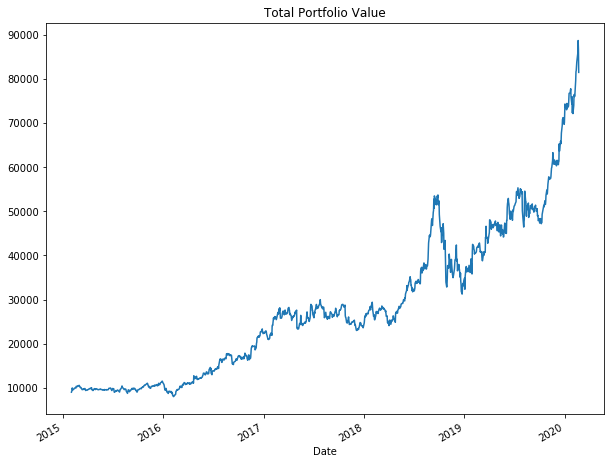

In [23]:
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

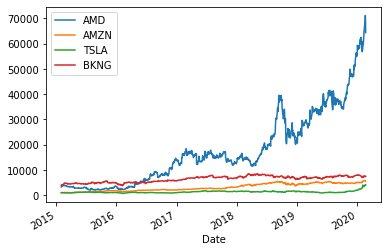

In [24]:
portfolio_val.drop('Total Pos',axis=1).plot(kind='line')